# **Data Exploration**

In [1]:
import pandas as pd

# Load the uploaded Excel file
file_path = "Case Study 3 Sales Prediction.xlsx"

# Try to load all sheet names first to understand structure
excel_file = pd.ExcelFile(file_path)
sheet_names = excel_file.sheet_names

# Display sheet names
sheet_names


['Data']

In [2]:
# Load the main sheet
df = pd.read_excel(file_path, sheet_name='Data')

# Display the first few rows to understand structure
df.head()


,Date,Region,Cluster,Country,Segment,Sales Amount
0,20230102,INTERNATIONAL,SOEUR,Italy,Other Reconstruction,-1.963788
1,20230102,INTERNATIONAL,SOEUR,Spain,Other Reconstruction,2.418589
2,20230102,INTERNATIONAL,UKINORD,Denmark,HIPS,2.582195
3,20230102,INTERNATIONAL,CEUR,Germany,Other Reconstruction,2.814559
4,20230102,INTERNATIONAL,FRABENE,Netherlands,HIPS,2.907201


In [3]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

# Extract Year, Month, Quarter
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Display the updated dataframe structure
df.head()


,Date,Region,Cluster,Country,Segment,Sales Amount,Year,Month,Quarter
0,2023-01-02,INTERNATIONAL,SOEUR,Italy,Other Reconstruction,-1.963788,2023,1,1
1,2023-01-02,INTERNATIONAL,SOEUR,Spain,Other Reconstruction,2.418589,2023,1,1
2,2023-01-02,INTERNATIONAL,UKINORD,Denmark,HIPS,2.582195,2023,1,1
3,2023-01-02,INTERNATIONAL,CEUR,Germany,Other Reconstruction,2.814559,2023,1,1
4,2023-01-02,INTERNATIONAL,FRABENE,Netherlands,HIPS,2.907201,2023,1,1


In [4]:
# Summary statistics for Sales Amount
sales_summary = df['Sales Amount'].describe()

# Count of entries per Region, Country, Segment
region_counts = df['Region'].value_counts()
country_counts = df['Country'].value_counts().head(10)  # Top 10 for readability
segment_counts = df['Segment'].value_counts()

# Show summary outputs
sales_summary, region_counts, country_counts, segment_counts


(count    29708.000000
 mean         4.257342
 std          5.488283
 min        -11.698970
 25%          3.332164
 50%          4.161365
 75%          4.757246
 max        127.072772
 Name: Sales Amount, dtype: float64,
 Region
 INTERNATIONAL    30981
 Name: count, dtype: int64,
 Country
 Spain          2460
 Italy          2448
 AUSTRALIA      2441
 Germany        2357
 UK             2306
 Belgium        2289
 Japan          2061
 New Zealand    2006
 France         1990
 Switzerland    1554
 Name: count, dtype: int64,
 Segment
 HIPS                    8755
 KNEES                   8274
 TRAUMA                  7400
 Other Reconstruction    6552
 Name: count, dtype: int64)

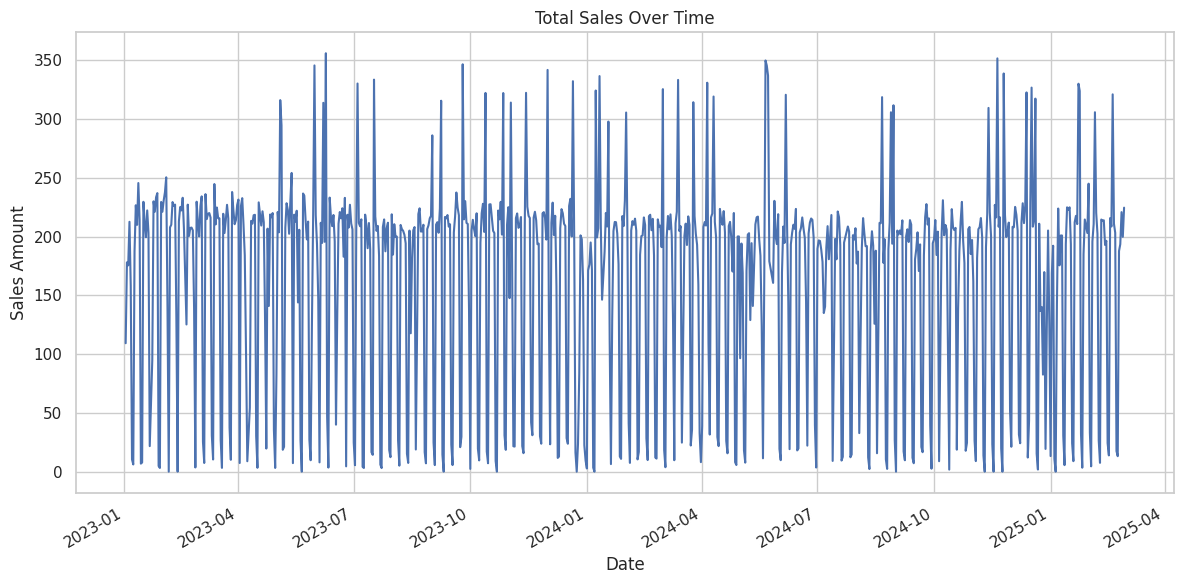

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Set style
sns.set(style="whitegrid")

# 1. Time series: Total sales over time
sales_by_date = df.groupby('Date')['Sales Amount'].sum()

plt.figure(figsize=(12, 6))
sales_by_date.plot()
plt.title('Total Sales Over Time')
plt.ylabel('Sales Amount')
plt.xlabel('Date')
plt.tight_layout()
plt.grid(True)
plt.show()


<ipython-input-6-cf21eb16013f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


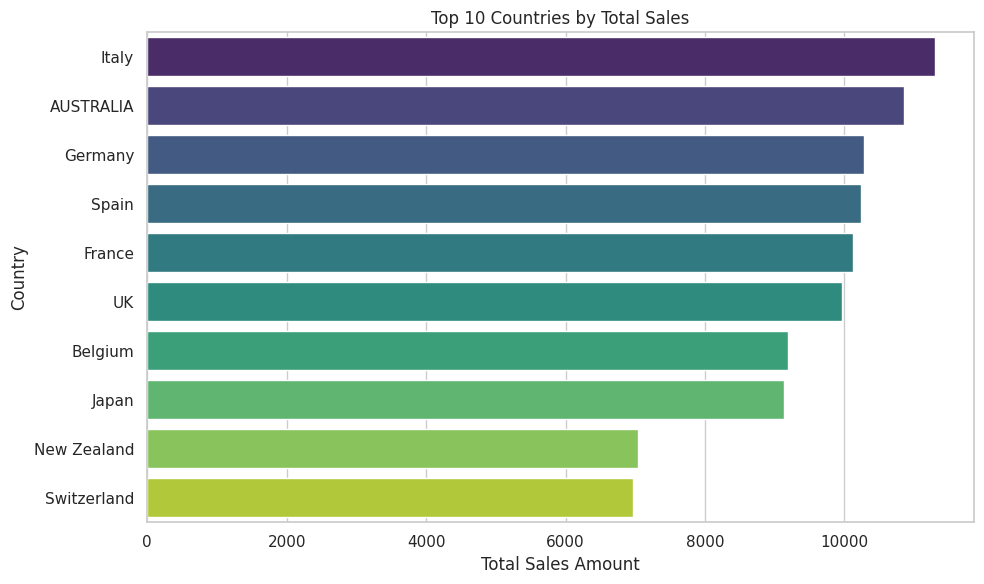

In [6]:
# 2. Total Sales by Top 10 Countries
top_countries = df.groupby('Country')['Sales Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Total Sales Amount')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


<ipython-input-7-a3cd19e613b6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_sales.values, y=segment_sales.index, palette='coolwarm')


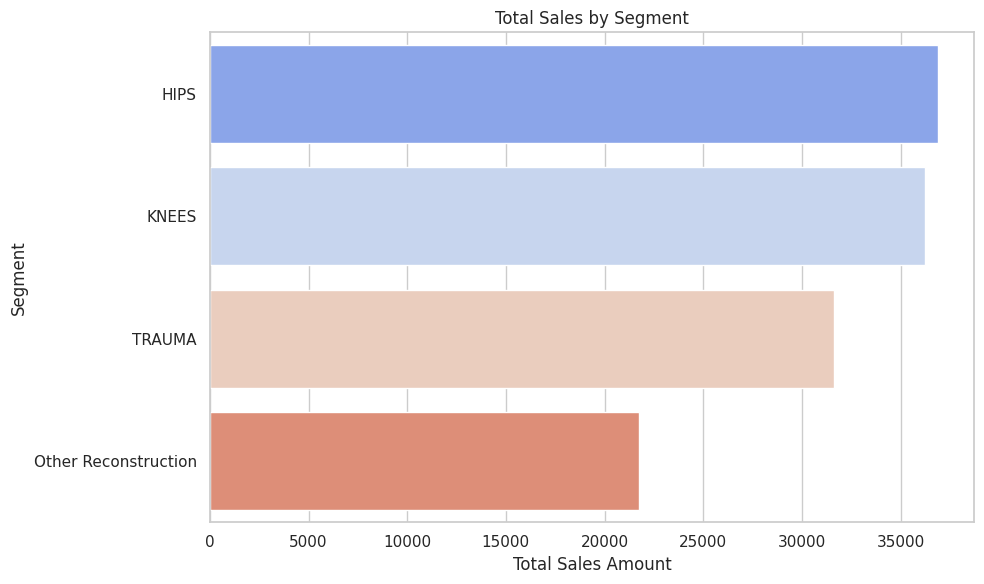

In [7]:
# 3. Total Sales by Segment
segment_sales = df.groupby('Segment')['Sales Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_sales.values, y=segment_sales.index, palette='coolwarm')
plt.title('Total Sales by Segment')
plt.xlabel('Total Sales Amount')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()


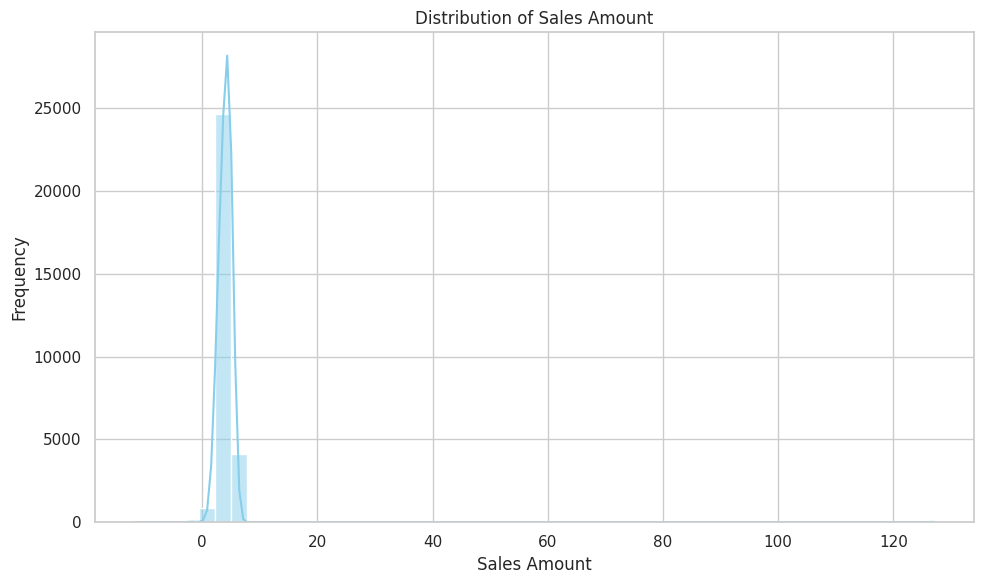

In [8]:
# 4. Distribution of Sales Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales Amount'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# **Data Cleaning**

In [9]:
# Check how many negative sales values exist
negative_sales_count = (df['Sales Amount'] < 0).sum()

# Display rows with negative sales for inspection
negative_sales_rows = df[df['Sales Amount'] < 0].head(10)

# Count of missing (null) values per column
missing_values = df.isnull().sum()

negative_sales_count, negative_sales_rows, missing_values


(np.int64(23),
            Date         Region Cluster    Country               Segment  \
 0    2023-01-02  INTERNATIONAL   SOEUR      Italy  Other Reconstruction   
 29   2023-01-03  INTERNATIONAL   SOEUR      Italy  Other Reconstruction   
 637  2023-01-18  INTERNATIONAL   SOEUR      Italy  Other Reconstruction   
 1062 2023-01-28  INTERNATIONAL   SOEUR      Spain                TRAUMA   
 1660 2023-02-11  INTERNATIONAL   SOEUR      Italy                 KNEES   
 4643 2023-04-25  INTERNATIONAL   SOEUR   PORTUGAL  Other Reconstruction   
 5904 2023-05-26  INTERNATIONAL   SOEUR      Italy  Other Reconstruction   
 6451 2023-06-09  INTERNATIONAL   SOEUR      Italy  Other Reconstruction   
 6746 2023-06-16  INTERNATIONAL     ANZ  AUSTRALIA                  HIPS   
 9064 2023-08-12  INTERNATIONAL   SOEUR      Italy                  HIPS   
 
       Sales Amount  Year  Month  Quarter  
 0        -1.963788  2023      1        1  
 29       -1.963788  2023      1        1  
 637      -1.06

In [10]:
# Step 1: Drop negative sales values
df_cleaned = df[df['Sales Amount'] >= 0].copy()

# Step 2: Impute missing Sales Amount using segment-wise mean
segment_means = df_cleaned.groupby('Segment')['Sales Amount'].transform('mean')
df_cleaned['Sales Amount'] = df_cleaned['Sales Amount'].fillna(segment_means)

# Verify if all missing and negative values are removed
final_missing_check = df_cleaned['Sales Amount'].isnull().sum()
final_negative_check = (df_cleaned['Sales Amount'] < 0).sum()

# Display final check results
final_missing_check, final_negative_check, df_cleaned.shape


(np.int64(0), np.int64(0), (29685, 9))

# **Feature Engineering**

In [11]:
# Step 3: Feature Engineering

# 1. Flag for Q4 seasonality
df_cleaned['Is_Q4'] = df_cleaned['Quarter'].apply(lambda q: 1 if q == 4 else 0)

# 2. Composite feature: Region_Segment
df_cleaned['Region_Segment'] = df_cleaned['Region'] + '_' + df_cleaned['Segment']

# 3. Sort values by Country and Date to compute lag/rolling features
df_cleaned.sort_values(by=['Country', 'Date'], inplace=True)

# 4. Lag Feature: Previous month's sales within same Country
df_cleaned['Lag_1_Sales'] = df_cleaned.groupby('Country')['Sales Amount'].shift(1)

# 5. Rolling average (3-month) within same Country
df_cleaned['RollingAvg_3M'] = df_cleaned.groupby('Country')['Sales Amount'].rolling(window=3).mean().reset_index(0, drop=True)

# Show a preview of new features
df_cleaned[['Date', 'Country', 'Sales Amount', 'Lag_1_Sales', 'RollingAvg_3M', 'Is_Q4', 'Region_Segment']].head(10)


,Date,Country,Sales Amount,Lag_1_Sales,RollingAvg_3M,Is_Q4,Region_Segment
52,2023-01-03,AUSTRALIA,3.834637,NaN,NaN,0,INTERNATIONAL_Other Reconstruction
65,2023-01-03,AUSTRALIA,4.456810,3.834637,NaN,0,INTERNATIONAL_KNEES
67,2023-01-03,AUSTRALIA,4.492807,4.456810,4.261418,0,INTERNATIONAL_TRAUMA
73,2023-01-03,AUSTRALIA,4.735905,4.492807,4.561841,0,INTERNATIONAL_HIPS
88,2023-01-04,AUSTRALIA,3.617048,4.735905,4.281920,0,INTERNATIONAL_Other Reconstruction
106,2023-01-04,AUSTRALIA,4.470246,3.617048,4.274400,0,INTERNATIONAL_HIPS
109,2023-01-04,AUSTRALIA,4.536514,4.470246,4.207936,0,INTERNATIONAL_TRAUMA
116,2023-01-04,AUSTRALIA,4.775666,4.536514,4.594142,0,INTERNATIONAL_KNEES
145,2023-01-05,AUSTRALIA,3.611070,4.775666,4.307750,0,INTERNATIONAL_Other Reconstruction
154,2023-01-05,AUSTRALIA,4.195635,3.611070,4.194123,0,INTERNATIONAL_HIPS


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 4: Prepare Data for Modeling

# Drop rows with NaN in lag/rolling features
df_model = df_cleaned.dropna(subset=['Lag_1_Sales', 'RollingAvg_3M'])

# Define features and target
features = ['Lag_1_Sales', 'RollingAvg_3M', 'Is_Q4']
X = df_model[features]
y = df_model['Sales Amount']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

# Train and evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'RMSE': rmse, 'MAE': mae, 'R2 Score': r2})

# Create results DataFrame
results_df = pd.DataFrame(results)

results_df


,Model,RMSE,MAE,R2 Score
0,Linear Regression,4.323247,0.810602,0.533225
1,Random Forest,3.138195,0.528791,0.754050
2,XGBoost,4.240949,0.569983,0.550827


# **Testing**

In [18]:


# Example test input (you can change these)
test_input = {
    'Lag_1_Sales': 4.2,
    'RollingAvg_3M': 4.5,
    'Is_Q4': 1
}

# Reuse best model from earlier: Random Forest (retrain on all cleaned data)
X_full = df_model[['Lag_1_Sales', 'RollingAvg_3M', 'Is_Q4']]
y_full = df_model['Sales Amount']
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_full, y_full)

# Predict for user-given input
user_input_df = pd.DataFrame([test_input])
predicted_sales = best_model.predict(user_input_df)[0]

predicted_sales


np.float64(4.734616511023158)

# **Hypertuning**

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [15]:
import joblib
# Retrain Random Forest model using the best parameters from GridSearchCV
optimized_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

# Train on the same train/test split used earlier
optimized_rf.fit(X_train, y_train)
y_pred_optimized = optimized_rf.predict(X_test)

# Evaluate performance
rmse_opt = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
mae_opt = mean_absolute_error(y_test, y_pred_optimized)
r2_opt = r2_score(y_test, y_pred_optimized)

# Return results
{
    "Optimized RMSE": rmse_opt,
    "Optimized MAE": mae_opt,
    "Optimized R² Score": r2_opt
}




{'Optimized RMSE': np.float64(2.989699707222097),
 'Optimized MAE': 0.5746279761891852,
 'Optimized R² Score': 0.7767751311340245}

# **Shap**

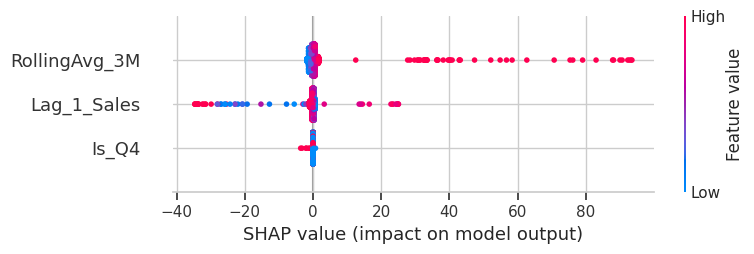

In [17]:
import shap

explainer = shap.Explainer(best_rf_model, X_test)
shap_values = explainer(X_test)

# Plot summary of feature importance
shap.summary_plot(shap_values, X_test)


# **Forecast**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuhrd2u9a/gg1lk5d7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuhrd2u9a/28vky9c4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50915', 'data', 'file=/tmp/tmpuhrd2u9a/gg1lk5d7.json', 'init=/tmp/tmpuhrd2u9a/28vky9c4.json', 'output', 'file=/tmp/tmpuhrd2u9a/prophet_modelpn2tmfod/prophet_model-20250412224123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:41:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:41:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


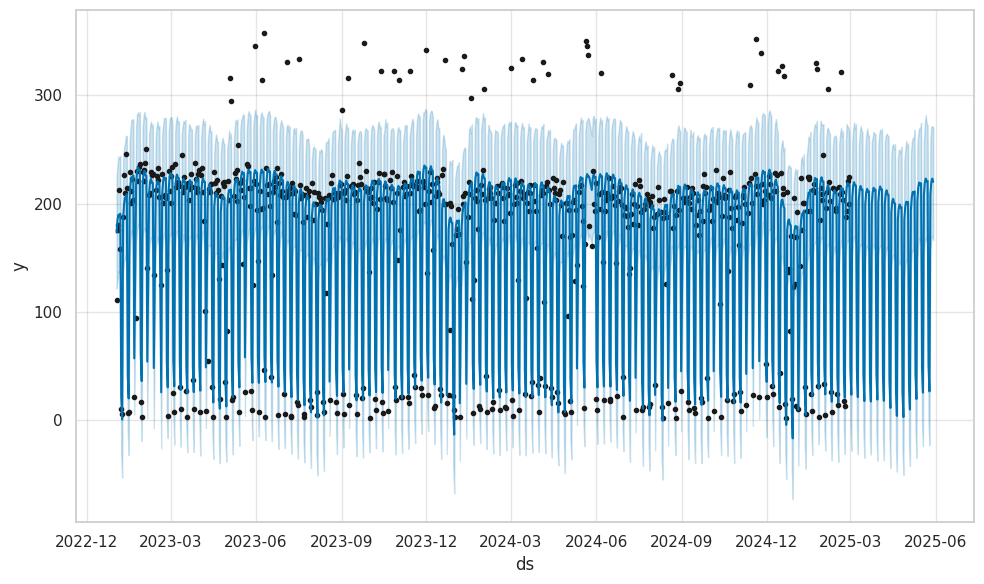

In [16]:
from prophet import Prophet

# Aggregate data monthly
df_prophet = df_cleaned.groupby('Date')['Sales Amount'].sum().reset_index()
df_prophet.columns = ['ds', 'y']

# Fit Prophet model
model = Prophet()
model.fit(df_prophet)

# Create future dataframe and predict
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast);
